# Assignment K-Nearest Neighbor Classification

In this exercise you will 

* implement a **K-Nearest Neighbor** (KNN) Classifier
* apply the KNN to a linear and a non-linear classification problem
* tune the hyperparameter *k*
* evaluate the train/validation  accuracies

In [18]:
# uncomment these lines to install the required dependencies.
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split

np.random.seed(0)

In [20]:
def plot_data_and_model_predictions(X_train, y_train, X_test, y_test, model=None):
    if model:
        # Plot the decision boundary.
        h = .1 # stepsize in mesh
        offset = .1
        offset = .1
        x_min, x_max = np.vstack([X_train,X_test])[:, 0].min() - offset, np.vstack([X_train,X_test])[:, 0].max() + offset
        y_min, y_max = np.vstack([X_train,X_test])[:, 1].min() - offset, np.vstack([X_train,X_test])[:, 1].max() + offset
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.cividis, alpha=.6)

    plt.plot(X_train[y_train==0,0],X_train[y_train==0,1],'b.',
         X_test[y_test==0,0],X_test[y_test==0,1],'bo',
         X_train[y_train==1,0],X_train[y_train==1,1],'r.',
         X_test[y_test==1,0],X_test[y_test==1,1],'ro')
    
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.legend(['Class 0 Train','Class 0 Test' ,'Class 1 Train','Class 1 Test'])
    if model:
        cbar = plt.colorbar()
        cbar.set_label('p(y=1|x)')
    plt.axis('tight')


## Generating some linear and nonlinear toy data

We use the scikit learn utilities to generatet a linear and a nonlinear toy data set in 2D

In [21]:
n_samples = 100

X_nonlinear, y_nonlinear = make_moons(n_samples=n_samples, noise=.5)
X_linear, y_linear = make_blobs(n_samples=n_samples, 
                                n_features=2, 
                                centers=np.array([[1,1],[-1,-1]]), 
                                cluster_std=[2.,2.])

test_size = .2
X_linear_train, X_linear_test, y_linear_train, y_linear_test = \
    train_test_split(X_linear, y_linear, test_size=test_size)

X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test = \
    train_test_split(X_nonlinear, y_nonlinear, test_size=test_size)

## Plotting the linear data

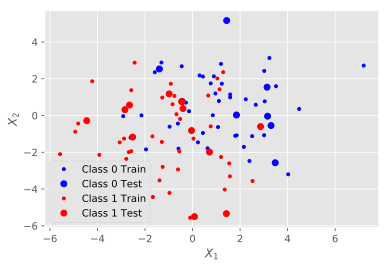

In [22]:
plot_data_and_model_predictions(X_linear_train, y_linear_train,
                                X_linear_test, y_linear_test)

## Plotting the nonlinear data

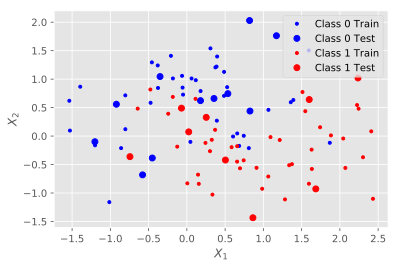

In [23]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train,
                                X_nonlinear_test, y_nonlinear_test)

## Building the models

The below two functions should return a compiled keras model that can be trained

In [32]:
class KNN:
    def __init__(self, X_train, y_train, k=5):
        self.X_train = X_train
        self.y_train = y_train
        self.classes = np.unique(y_train)
        self.k = k
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            y_pred_idx = ((self.X_train - x)**2).sum(axis=1).argsort()[:self.k]
            c_idx = np.array([sum(self.y_train[y_pred_idx]==c) for c in self.classes]).argmax()
            y_pred.append(self.classes[c_idx])
        return np.array(y_pred)


## Linear Classification and KNN for k=1

Text(0.5, 1.0, 'Accuracy: 0.65')

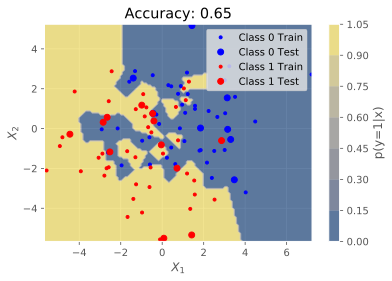

In [33]:
knn = KNN(X_linear_train, y_linear_train, k=1)
plot_data_and_model_predictions(X_linear_train, 
                                y_linear_train, 
                                X_linear_test, 
                                y_linear_test,knn)
y_linear_test_pred = knn.predict(X_linear_test)
plt.title(f'Accuracy: {(y_linear_test==y_linear_test_pred).mean():0.2}')

## Linear Classification and KNN for k=10

Text(0.5, 1.0, 'Accuracy: 0.8')

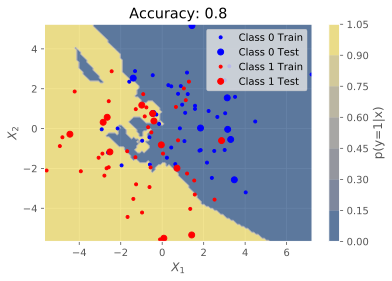

In [34]:
knn = KNN(X_linear_train, y_linear_train, k=10)
plot_data_and_model_predictions(X_linear_train, 
                                y_linear_train, 
                                X_linear_test, 
                                y_linear_test,knn)
y_linear_test_pred = knn.predict(X_linear_test)
plt.title(f'Accuracy: {(y_linear_test==y_linear_test_pred).mean():0.2}')

## Linear Classification and Hyperparameter Optimization

We use grid search to find the best *k* parameter. 

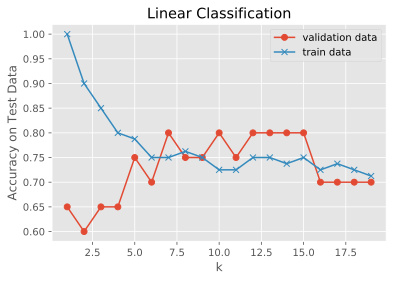

In [35]:
acc_val = []
acc_train = []
for k in range(1,20):
    knn = KNN(X_linear_train, y_linear_train, k=k)
    acc_val.append((k,(y_linear_test==knn.predict(X_linear_test)).mean()))
    acc_train.append((k,(y_linear_train==knn.predict(X_linear_train)).mean()))

k, val_acc = zip(*acc_val)
_, train_acc = zip(*acc_train)
plt.plot(k, val_acc,'o-', k, train_acc,'x-')
plt.xlabel('k')
plt.ylabel('Accuracy on Test Data')
plt.title('Linear Classification')
plt.legend(['validation data', 'train data'])
plt.savefig('val-vs-train.pdf')

# Non-linear Classification

Now let's look at a data set that could not be classified correctly with a linear method such as the NCC. 

How does the hyperparameter *k* which controls the complexity of the KNN model influence the generalization ability?

## Non-linear Classification and KNN for k=1

Text(0.5, 1.0, 'Accuracy: 0.75')

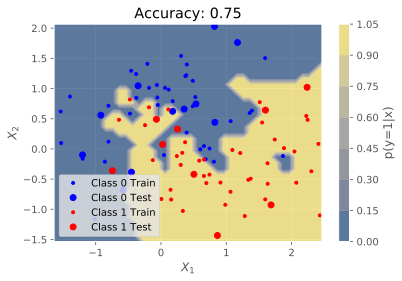

In [11]:
knn = KNN(X_nonlinear_train, y_nonlinear_train, k=1)
plot_data_and_model_predictions(X_nonlinear_train, 
                                y_nonlinear_train, 
                                X_nonlinear_test, 
                                y_nonlinear_test,knn)
y_nonlinear_test_pred = knn.predict(X_nonlinear_test)
plt.title(f'Accuracy: {(y_nonlinear_test==y_nonlinear_test_pred).mean():0.2}')

## Linear Classification and KNN for k=10

Text(0.5, 1.0, 'Accuracy: 0.8')

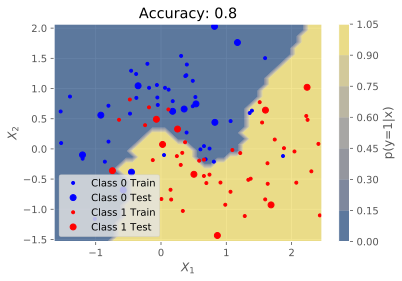

In [12]:
knn = KNN(X_nonlinear_train, y_nonlinear_train, k=10)
plot_data_and_model_predictions(X_nonlinear_train, 
                                y_nonlinear_train, 
                                X_nonlinear_test, 
                                y_nonlinear_test,knn)
y_nonlinear_test_pred = knn.predict(X_nonlinear_test)
plt.title(f'Accuracy: {(y_nonlinear_test==y_nonlinear_test_pred).mean():0.2}')

## Linear Classification and Hyperparameter Optimization

We use grid search to find the best *k* parameter. 

Text(0.5, 1.0, 'Non-linear Classification')

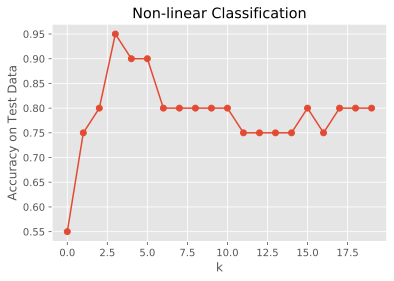

In [13]:
acc_val = []
for k in range(20):
    knn = KNN(X_nonlinear_train, y_nonlinear_train, k=k)
    acc_val.append((k,(y_nonlinear_test==knn.predict(X_nonlinear_test)).mean()))

k, acc = zip(*acc_val)
plt.plot(k, acc,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy on Test Data')
plt.title('Non-linear Classification')